## Solving Santander Challenge on Kaggle 

You can find more details about this challenge following the link below:
https://www.kaggle.com/c/santander-customer-transaction-prediction

This Notebook focuses on standard approach in application of XGBoost algorithm.
If you are running this challenge from Google colabs, change the runtime to GPU, it will save you a lot of time.

Kindly,

Baur Safi (https://baursafi.github.io) 

In [1]:
import pandas as pd
import time
from matplotlib import pyplot as plt
import numpy as np
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, make_scorer, roc_auc_score
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
td = pd.read_table('train.csv', sep = ',')

In [3]:
X = td[td.columns[2:]]
y = td.loc[:,'target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .25)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(150000, 200) (50000, 200) (150000,) (50000,)


### Preprocessing:
1. Standard Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X = scaler.transform(X)

### Modelling:
1. XGBoost

In [6]:
import xgboost as xgb
xgc = xgb.XGBClassifier(base_score=0.5, 
                        booster='dart', 
                        colsample_bylevel=1, 
                        colsample_bytree=0.6, 
                        gamma=0, 
                        learning_rate=0.02, 
                        max_delta_step=0, 
                        max_depth=5, 
                        min_child_weight=1, 
                        n_estimators=15000, 
                        n_jobs=1, 
                        nthread=None, 
                        objective='binary:logistic', 
                        random_state=42, 
                        reg_alpha=0.01, 
                        reg_lambda=10, 
                        scale_pos_weight=1, 
                        seed=42, 
                        silent=True, 
                        subsample=0.7)

In [8]:
xgc.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_val, y_val)], 
        early_stopping_rounds=10, 
        verbose=True,
        eval_metric='auc')

[0]	validation_0-auc:0.618151	validation_1-auc:0.615083
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.634917	validation_1-auc:0.62553
[2]	validation_0-auc:0.68101	validation_1-auc:0.66947
[3]	validation_0-auc:0.695322	validation_1-auc:0.681287
[4]	validation_0-auc:0.705711	validation_1-auc:0.690331
[5]	validation_0-auc:0.710165	validation_1-auc:0.695351
[6]	validation_0-auc:0.711234	validation_1-auc:0.696653
[7]	validation_0-auc:0.719258	validation_1-auc:0.705537
[8]	validation_0-auc:0.719059	validation_1-auc:0.704879
[9]	validation_0-auc:0.721692	validation_1-auc:0.705568
[10]	validation_0-auc:0.727706	validation_1-auc:0.710808
[11]	validation_0-auc:0.727645	validation_1-auc:0.711102
[12]	validation_0-auc:0.730744	validation_1-auc:0.712838
[13]	validation_0-auc:0.736579	validation_1-auc:0.718958
[14]	validation_0-auc:0.738413	validation_1-auc:0.720323
[

[142]	validation_0-auc:0.823864	validation_1-auc:0.792552
[143]	validation_0-auc:0.824495	validation_1-auc:0.793021
[144]	validation_0-auc:0.82515	validation_1-auc:0.793502
[145]	validation_0-auc:0.825643	validation_1-auc:0.79395
[146]	validation_0-auc:0.826023	validation_1-auc:0.794278
[147]	validation_0-auc:0.826159	validation_1-auc:0.7942
[148]	validation_0-auc:0.826906	validation_1-auc:0.794735
[149]	validation_0-auc:0.827306	validation_1-auc:0.795017
[150]	validation_0-auc:0.828021	validation_1-auc:0.79561
[151]	validation_0-auc:0.828604	validation_1-auc:0.796203
[152]	validation_0-auc:0.828931	validation_1-auc:0.796478
[153]	validation_0-auc:0.829627	validation_1-auc:0.796985
[154]	validation_0-auc:0.830249	validation_1-auc:0.79743
[155]	validation_0-auc:0.830606	validation_1-auc:0.797816
[156]	validation_0-auc:0.830983	validation_1-auc:0.798276
[157]	validation_0-auc:0.831581	validation_1-auc:0.798987
[158]	validation_0-auc:0.832199	validation_1-auc:0.79964
[159]	validation_0-au

[284]	validation_0-auc:0.875999	validation_1-auc:0.833994
[285]	validation_0-auc:0.87629	validation_1-auc:0.834269
[286]	validation_0-auc:0.876518	validation_1-auc:0.834457
[287]	validation_0-auc:0.876743	validation_1-auc:0.834621
[288]	validation_0-auc:0.877076	validation_1-auc:0.834928
[289]	validation_0-auc:0.877128	validation_1-auc:0.834989
[290]	validation_0-auc:0.877372	validation_1-auc:0.835261
[291]	validation_0-auc:0.877703	validation_1-auc:0.835547
[292]	validation_0-auc:0.878055	validation_1-auc:0.835794
[293]	validation_0-auc:0.878337	validation_1-auc:0.836071
[294]	validation_0-auc:0.878705	validation_1-auc:0.836385
[295]	validation_0-auc:0.878933	validation_1-auc:0.836522
[296]	validation_0-auc:0.879183	validation_1-auc:0.836764
[297]	validation_0-auc:0.879405	validation_1-auc:0.836913
[298]	validation_0-auc:0.879552	validation_1-auc:0.837074
[299]	validation_0-auc:0.879884	validation_1-auc:0.837362
[300]	validation_0-auc:0.880085	validation_1-auc:0.837547
[301]	validatio

[426]	validation_0-auc:0.902645	validation_1-auc:0.854508
[427]	validation_0-auc:0.902771	validation_1-auc:0.854642
[428]	validation_0-auc:0.902909	validation_1-auc:0.854768
[429]	validation_0-auc:0.903029	validation_1-auc:0.854848
[430]	validation_0-auc:0.903145	validation_1-auc:0.854945
[431]	validation_0-auc:0.903274	validation_1-auc:0.855048
[432]	validation_0-auc:0.903408	validation_1-auc:0.855191
[433]	validation_0-auc:0.903568	validation_1-auc:0.855283
[434]	validation_0-auc:0.90363	validation_1-auc:0.855379
[435]	validation_0-auc:0.90376	validation_1-auc:0.855494
[436]	validation_0-auc:0.903859	validation_1-auc:0.85556
[437]	validation_0-auc:0.903975	validation_1-auc:0.855712
[438]	validation_0-auc:0.904132	validation_1-auc:0.855857
[439]	validation_0-auc:0.9043	validation_1-auc:0.85592
[440]	validation_0-auc:0.904408	validation_1-auc:0.856002
[441]	validation_0-auc:0.90455	validation_1-auc:0.856151
[442]	validation_0-auc:0.9047	validation_1-auc:0.856322
[443]	validation_0-auc:

[568]	validation_0-auc:0.918595	validation_1-auc:0.866778
[569]	validation_0-auc:0.91867	validation_1-auc:0.866912
[570]	validation_0-auc:0.918786	validation_1-auc:0.866996
[571]	validation_0-auc:0.918862	validation_1-auc:0.867021
[572]	validation_0-auc:0.918961	validation_1-auc:0.867075
[573]	validation_0-auc:0.919099	validation_1-auc:0.867181
[574]	validation_0-auc:0.91919	validation_1-auc:0.867161
[575]	validation_0-auc:0.919288	validation_1-auc:0.867271
[576]	validation_0-auc:0.919372	validation_1-auc:0.867348
[577]	validation_0-auc:0.919438	validation_1-auc:0.867385
[578]	validation_0-auc:0.919529	validation_1-auc:0.867435
[579]	validation_0-auc:0.919651	validation_1-auc:0.867518
[580]	validation_0-auc:0.919724	validation_1-auc:0.86756
[581]	validation_0-auc:0.919875	validation_1-auc:0.867698
[582]	validation_0-auc:0.920005	validation_1-auc:0.867801
[583]	validation_0-auc:0.920042	validation_1-auc:0.867819
[584]	validation_0-auc:0.920125	validation_1-auc:0.867853
[585]	validation_

[710]	validation_0-auc:0.929683	validation_1-auc:0.874787
[711]	validation_0-auc:0.929734	validation_1-auc:0.874845
[712]	validation_0-auc:0.929781	validation_1-auc:0.874888
[713]	validation_0-auc:0.929852	validation_1-auc:0.874945
[714]	validation_0-auc:0.929952	validation_1-auc:0.875028
[715]	validation_0-auc:0.930038	validation_1-auc:0.875089
[716]	validation_0-auc:0.93011	validation_1-auc:0.875126
[717]	validation_0-auc:0.930175	validation_1-auc:0.875197
[718]	validation_0-auc:0.930255	validation_1-auc:0.875262
[719]	validation_0-auc:0.930347	validation_1-auc:0.875329
[720]	validation_0-auc:0.930408	validation_1-auc:0.875395
[721]	validation_0-auc:0.930499	validation_1-auc:0.875389
[722]	validation_0-auc:0.930574	validation_1-auc:0.875445
[723]	validation_0-auc:0.930646	validation_1-auc:0.875495
[724]	validation_0-auc:0.930748	validation_1-auc:0.875581
[725]	validation_0-auc:0.930827	validation_1-auc:0.875627
[726]	validation_0-auc:0.930846	validation_1-auc:0.875672
[727]	validatio

[852]	validation_0-auc:0.938041	validation_1-auc:0.880519
[853]	validation_0-auc:0.938091	validation_1-auc:0.880544
[854]	validation_0-auc:0.938155	validation_1-auc:0.880601
[855]	validation_0-auc:0.938191	validation_1-auc:0.880656
[856]	validation_0-auc:0.938231	validation_1-auc:0.880694
[857]	validation_0-auc:0.938294	validation_1-auc:0.88073
[858]	validation_0-auc:0.938356	validation_1-auc:0.880779
[859]	validation_0-auc:0.938393	validation_1-auc:0.880843
[860]	validation_0-auc:0.938441	validation_1-auc:0.880885
[861]	validation_0-auc:0.938508	validation_1-auc:0.880937
[862]	validation_0-auc:0.938535	validation_1-auc:0.880966
[863]	validation_0-auc:0.938583	validation_1-auc:0.880999
[864]	validation_0-auc:0.938653	validation_1-auc:0.88106
[865]	validation_0-auc:0.938695	validation_1-auc:0.88111
[866]	validation_0-auc:0.938753	validation_1-auc:0.881148
[867]	validation_0-auc:0.938781	validation_1-auc:0.881181
[868]	validation_0-auc:0.938822	validation_1-auc:0.881205
[869]	validation_

[994]	validation_0-auc:0.94421	validation_1-auc:0.884699
[995]	validation_0-auc:0.944244	validation_1-auc:0.884733
[996]	validation_0-auc:0.944283	validation_1-auc:0.884761
[997]	validation_0-auc:0.944313	validation_1-auc:0.884802
[998]	validation_0-auc:0.944355	validation_1-auc:0.884838
[999]	validation_0-auc:0.944409	validation_1-auc:0.884884
[1000]	validation_0-auc:0.944457	validation_1-auc:0.884932
[1001]	validation_0-auc:0.944498	validation_1-auc:0.884953
[1002]	validation_0-auc:0.944534	validation_1-auc:0.884959
[1003]	validation_0-auc:0.944578	validation_1-auc:0.885004
[1004]	validation_0-auc:0.944599	validation_1-auc:0.885029
[1005]	validation_0-auc:0.944643	validation_1-auc:0.885067
[1006]	validation_0-auc:0.944675	validation_1-auc:0.885067
[1007]	validation_0-auc:0.944726	validation_1-auc:0.885111
[1008]	validation_0-auc:0.944755	validation_1-auc:0.885121
[1009]	validation_0-auc:0.944774	validation_1-auc:0.885134
[1010]	validation_0-auc:0.94481	validation_1-auc:0.885155
[1011

[1134]	validation_0-auc:0.949369	validation_1-auc:0.887933
[1135]	validation_0-auc:0.949391	validation_1-auc:0.887947
[1136]	validation_0-auc:0.94941	validation_1-auc:0.88797
[1137]	validation_0-auc:0.949444	validation_1-auc:0.887987
[1138]	validation_0-auc:0.949462	validation_1-auc:0.88799
[1139]	validation_0-auc:0.949495	validation_1-auc:0.88802
[1140]	validation_0-auc:0.949534	validation_1-auc:0.888045
[1141]	validation_0-auc:0.949551	validation_1-auc:0.888049
[1142]	validation_0-auc:0.949601	validation_1-auc:0.88807
[1143]	validation_0-auc:0.949618	validation_1-auc:0.888064
[1144]	validation_0-auc:0.949659	validation_1-auc:0.888098
[1145]	validation_0-auc:0.949693	validation_1-auc:0.888109
[1146]	validation_0-auc:0.949719	validation_1-auc:0.88811
[1147]	validation_0-auc:0.949742	validation_1-auc:0.888112
[1148]	validation_0-auc:0.949775	validation_1-auc:0.88813
[1149]	validation_0-auc:0.94981	validation_1-auc:0.888144
[1150]	validation_0-auc:0.949848	validation_1-auc:0.888165
[1151

[1274]	validation_0-auc:0.953394	validation_1-auc:0.890051
[1275]	validation_0-auc:0.953427	validation_1-auc:0.890074
[1276]	validation_0-auc:0.95346	validation_1-auc:0.890088
[1277]	validation_0-auc:0.953483	validation_1-auc:0.890114
[1278]	validation_0-auc:0.953529	validation_1-auc:0.890128
[1279]	validation_0-auc:0.953561	validation_1-auc:0.890163
[1280]	validation_0-auc:0.953593	validation_1-auc:0.890163
[1281]	validation_0-auc:0.953625	validation_1-auc:0.890184
[1282]	validation_0-auc:0.953664	validation_1-auc:0.890203
[1283]	validation_0-auc:0.953679	validation_1-auc:0.890227
[1284]	validation_0-auc:0.953714	validation_1-auc:0.890265
[1285]	validation_0-auc:0.953747	validation_1-auc:0.890275
[1286]	validation_0-auc:0.953779	validation_1-auc:0.890296
[1287]	validation_0-auc:0.953814	validation_1-auc:0.890316
[1288]	validation_0-auc:0.953845	validation_1-auc:0.890314
[1289]	validation_0-auc:0.953878	validation_1-auc:0.890322
[1290]	validation_0-auc:0.953908	validation_1-auc:0.89032

[1414]	validation_0-auc:0.957037	validation_1-auc:0.891997
[1415]	validation_0-auc:0.95707	validation_1-auc:0.892016
[1416]	validation_0-auc:0.957087	validation_1-auc:0.892031
[1417]	validation_0-auc:0.957103	validation_1-auc:0.892057
[1418]	validation_0-auc:0.957124	validation_1-auc:0.892078
[1419]	validation_0-auc:0.957136	validation_1-auc:0.892106
[1420]	validation_0-auc:0.95716	validation_1-auc:0.892119
[1421]	validation_0-auc:0.957186	validation_1-auc:0.892122
[1422]	validation_0-auc:0.957204	validation_1-auc:0.892133
[1423]	validation_0-auc:0.957224	validation_1-auc:0.89214
[1424]	validation_0-auc:0.95724	validation_1-auc:0.892142
[1425]	validation_0-auc:0.957257	validation_1-auc:0.892159
[1426]	validation_0-auc:0.957285	validation_1-auc:0.892167
[1427]	validation_0-auc:0.957317	validation_1-auc:0.892168
[1428]	validation_0-auc:0.957349	validation_1-auc:0.892172
[1429]	validation_0-auc:0.957369	validation_1-auc:0.892178
[1430]	validation_0-auc:0.95739	validation_1-auc:0.892182
[1

[1554]	validation_0-auc:0.960122	validation_1-auc:0.893412
[1555]	validation_0-auc:0.960138	validation_1-auc:0.893396
[1556]	validation_0-auc:0.960162	validation_1-auc:0.893408
[1557]	validation_0-auc:0.960173	validation_1-auc:0.893419
[1558]	validation_0-auc:0.960195	validation_1-auc:0.893429
[1559]	validation_0-auc:0.960229	validation_1-auc:0.893445
[1560]	validation_0-auc:0.960246	validation_1-auc:0.893456
[1561]	validation_0-auc:0.960272	validation_1-auc:0.893462
[1562]	validation_0-auc:0.960302	validation_1-auc:0.893476
[1563]	validation_0-auc:0.960325	validation_1-auc:0.893489
[1564]	validation_0-auc:0.960343	validation_1-auc:0.893486
[1565]	validation_0-auc:0.960363	validation_1-auc:0.893497
[1566]	validation_0-auc:0.960385	validation_1-auc:0.893498
[1567]	validation_0-auc:0.960402	validation_1-auc:0.893518
[1568]	validation_0-auc:0.960432	validation_1-auc:0.893531
[1569]	validation_0-auc:0.960448	validation_1-auc:0.893533
[1570]	validation_0-auc:0.960461	validation_1-auc:0.8935

[1694]	validation_0-auc:0.962868	validation_1-auc:0.894547
[1695]	validation_0-auc:0.96289	validation_1-auc:0.894548
[1696]	validation_0-auc:0.962913	validation_1-auc:0.894559
[1697]	validation_0-auc:0.962934	validation_1-auc:0.894579
[1698]	validation_0-auc:0.962953	validation_1-auc:0.894592
[1699]	validation_0-auc:0.962968	validation_1-auc:0.894592
[1700]	validation_0-auc:0.962988	validation_1-auc:0.894599
[1701]	validation_0-auc:0.963003	validation_1-auc:0.894604
[1702]	validation_0-auc:0.963031	validation_1-auc:0.894615
[1703]	validation_0-auc:0.963044	validation_1-auc:0.894613
[1704]	validation_0-auc:0.963063	validation_1-auc:0.894624
[1705]	validation_0-auc:0.963088	validation_1-auc:0.894625
[1706]	validation_0-auc:0.963107	validation_1-auc:0.894619
[1707]	validation_0-auc:0.963121	validation_1-auc:0.894633
[1708]	validation_0-auc:0.963137	validation_1-auc:0.894644
[1709]	validation_0-auc:0.963153	validation_1-auc:0.894648
[1710]	validation_0-auc:0.963182	validation_1-auc:0.89466

[1834]	validation_0-auc:0.965321	validation_1-auc:0.89555
[1835]	validation_0-auc:0.965339	validation_1-auc:0.895563
[1836]	validation_0-auc:0.965359	validation_1-auc:0.895586
[1837]	validation_0-auc:0.965382	validation_1-auc:0.895602
[1838]	validation_0-auc:0.965401	validation_1-auc:0.895608
[1839]	validation_0-auc:0.96541	validation_1-auc:0.895606
[1840]	validation_0-auc:0.965424	validation_1-auc:0.895603
[1841]	validation_0-auc:0.965447	validation_1-auc:0.895597
[1842]	validation_0-auc:0.965468	validation_1-auc:0.895603
[1843]	validation_0-auc:0.965486	validation_1-auc:0.895618
[1844]	validation_0-auc:0.965498	validation_1-auc:0.895614
[1845]	validation_0-auc:0.965511	validation_1-auc:0.895622
[1846]	validation_0-auc:0.96553	validation_1-auc:0.895621
[1847]	validation_0-auc:0.965551	validation_1-auc:0.895626
[1848]	validation_0-auc:0.965572	validation_1-auc:0.895633
[1849]	validation_0-auc:0.965588	validation_1-auc:0.895645
[1850]	validation_0-auc:0.965612	validation_1-auc:0.895646


[1974]	validation_0-auc:0.96752	validation_1-auc:0.896266
[1975]	validation_0-auc:0.967533	validation_1-auc:0.896276
[1976]	validation_0-auc:0.967546	validation_1-auc:0.89627
[1977]	validation_0-auc:0.967565	validation_1-auc:0.896279
[1978]	validation_0-auc:0.96758	validation_1-auc:0.89627
[1979]	validation_0-auc:0.967593	validation_1-auc:0.896272
[1980]	validation_0-auc:0.967601	validation_1-auc:0.896275
[1981]	validation_0-auc:0.967614	validation_1-auc:0.896264
[1982]	validation_0-auc:0.967633	validation_1-auc:0.896273
[1983]	validation_0-auc:0.967652	validation_1-auc:0.896297
[1984]	validation_0-auc:0.967662	validation_1-auc:0.896306
[1985]	validation_0-auc:0.967678	validation_1-auc:0.896322
[1986]	validation_0-auc:0.967696	validation_1-auc:0.896335
[1987]	validation_0-auc:0.96771	validation_1-auc:0.896342
[1988]	validation_0-auc:0.96773	validation_1-auc:0.896355
[1989]	validation_0-auc:0.967748	validation_1-auc:0.896365
[1990]	validation_0-auc:0.967755	validation_1-auc:0.896358
[19

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=15000,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0.01, reg_lambda=10, scale_pos_weight=1,
       seed=42, silent=True, subsample=0.7)

Best ROC_AUC_score: 0.094 and the score is 0.094



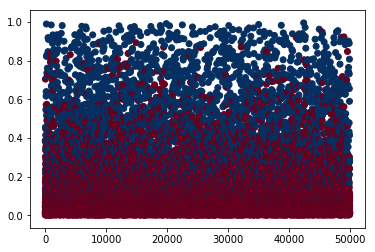

In [12]:
roc = []
validation = xgc.predict_proba(X_val)[:,1]
x = [x/1000 for x in range(1, 400)]
for i in x:
    roc.append(roc_auc_score(y_val, np.where(validation<i, 0, 1)))

print('Best ROC_AUC_score: {0:.3f} and the score is {0:.3f}\n'.format(np.argmax(roc)/1000, max(roc)))

plt.scatter(x = range(0, len(X_val)), y = validation, c = y_val ,cmap=plt.cm.get_cmap('RdBu'));
plt.show()

[[36063  9002]
 [  830  4105]]


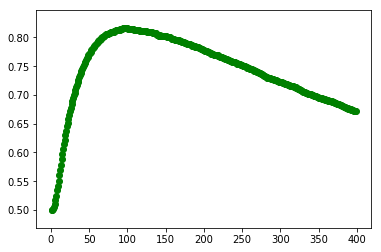

In [16]:
print(confusion_matrix(y_val, np.where(validation<np.argmax(roc)/1000, 0, 1)))
plt.scatter(x = range(1,400), y = roc, c = 'g')
plt.show();

In [21]:
submission = pd.read_csv('test.csv')
idcode = submission['ID_code']
submission = submission[submission.columns[1:]]
submission = scaler.transform(submission)
validation = xgc.predict_proba(submission)[:,1]
print(validation.shape)
two_alg_predict = np.where(validation<np.argmax(roc)/1000,0,1)
predict = {'ID_code':idcode, 'target':two_alg_predict}
submission = pd.DataFrame(predict)
submission.to_csv('submission_20190313_01.csv', index = False)

(200000,)


The best achieved score was 0.814. With leaderboard scores .922 I am at 4000th spot out of 5000. Which is not that bad. It looks like I would need to use other tactics to improve the score and or look at the prediction differently. 